In [237]:
import pandas as pd
#Base dados .csv (separado por vírgulas)
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte) #ler csv
dados.head() # 5 primeiros e mostra em formato de dataframe

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [238]:
dados.shape #tamanho de linhas e colunas

(127380, 136)

In [239]:
dados["SG_UF_RESIDENCIA"] #acessa só essa coluna e mostra em formato series


0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [240]:
dados.columns.values #mostra todas a colunas do dataset

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [241]:
dados[["SG_UF_RESIDENCIA", "Q025"]] #para mostrar mais de uma coluna é necessário passar uma lista de colunas

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [242]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [243]:
dados["SG_UF_RESIDENCIA"].unique() #posíveis valores para essa coluna de maneira unica

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [244]:
len(dados["SG_UF_RESIDENCIA"].unique()) #imprime a quantidade de possíveis valores

27

In [245]:
dados["SG_UF_RESIDENCIA"].value_counts() #quantos usuários apareceu no dataset

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [246]:
dados["NU_IDADE"].value_counts() #quantas pessoas possuem de acordo com data idade, ordenado pela quantidade

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [247]:
dados["NU_IDADE"].value_counts().sort_index() #ordena pela idade(index) da series

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

**Desafio 01:** Proporção dos inscritos por idade.

In [248]:
idades = dados["NU_IDADE"].unique()
idades.sort()
inscritos = dados.shape[0]

for i in idades:
  qtd_por_idade = dados.query(f"NU_IDADE == {i}").shape[0]
  porcentagem = (qtd_por_idade*100)/inscritos
  print(f"{porcentagem:.5f}% dos inscritos possui {i} anos")

0.00314% dos inscritos possui 13 anos
0.11069% dos inscritos possui 14 anos
1.57717% dos inscritos possui 15 anos
6.14696% dos inscritos possui 16 anos
16.68708% dos inscritos possui 17 anos
16.84095% dos inscritos possui 18 anos
11.31889% dos inscritos possui 19 anos
8.17475% dos inscritos possui 20 anos
5.70498% dos inscritos possui 21 anos
4.65065% dos inscritos possui 22 anos
3.66463% dos inscritos possui 23 anos
3.01303% dos inscritos possui 24 anos
2.45564% dos inscritos possui 25 anos
2.13299% dos inscritos possui 26 anos
1.73811% dos inscritos possui 27 anos
1.54420% dos inscritos possui 28 anos
1.27179% dos inscritos possui 29 anos
1.25137% dos inscritos possui 30 anos
1.14618% dos inscritos possui 31 anos
1.02606% dos inscritos possui 32 anos
0.91302% dos inscritos possui 33 anos
0.80782% dos inscritos possui 34 anos
0.73324% dos inscritos possui 35 anos
0.70105% dos inscritos possui 36 anos
0.69870% dos inscritos possui 37 anos
0.62019% dos inscritos possui 38 anos
0.54875% 

A maioria dos estudantes que fazem o enem estão entre 17 e 20 anos


In [249]:
#porcentagem de alunos entre 17 e 20 anos
idades_com_maior_participacao = [17, 18, 19, 20]
qtd_total = 0
for i in idades_com_maior_participacao:
  qtd_por_idade = dados.query(f"NU_IDADE == {i}").shape[0]
  qtd_total += qtd_por_idade

porcentagem_com_idades_de_maior_participacao = (qtd_total*100)/inscritos
print(f"{porcentagem_com_idades_de_maior_participacao:.5f}% do inscritos possuem entre 17 e 20 anos")

53.02167% do inscritos possuem entre 17 e 20 anos


**Desafio 02:** Descobrir de quais estados são os inscritos com 13 anos.


In [250]:

dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Os inscritos com 13 anos são do estado de São Paulo, Mato Grosso, Amapá e Bahia

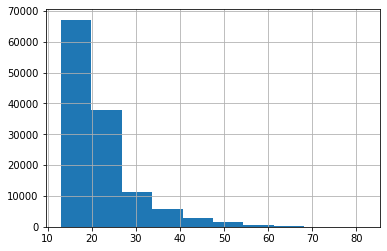

In [251]:
dados["NU_IDADE"].hist() #plota a quantidade de inscritos por idade

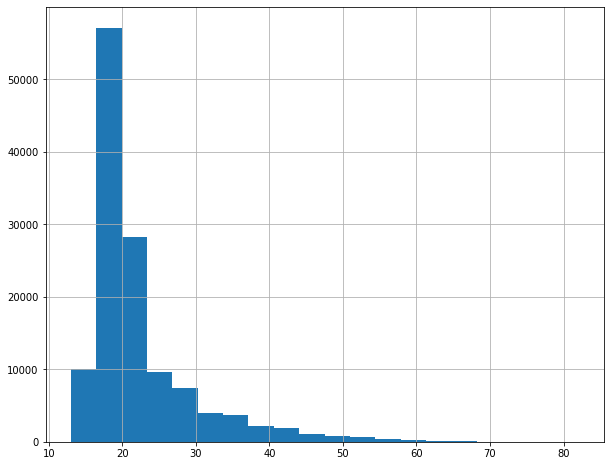

In [252]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8)) #aumenta o intervalo para 20 e tamanho da figura

**Desafio 03:** Adicionar título no gráfico


Text(0.5, 1.0, 'Quantidade de inscritos por idade')

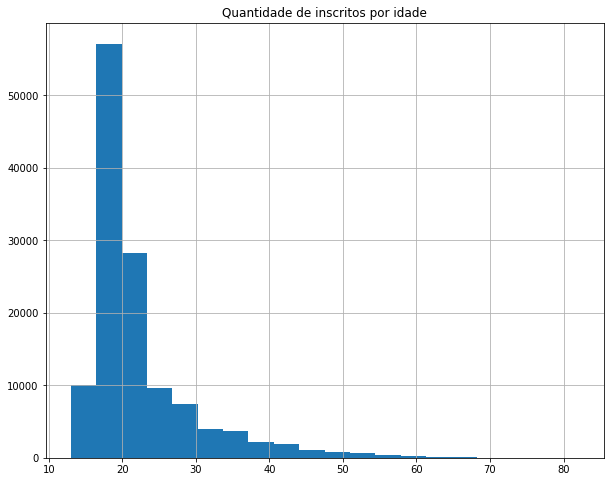

In [253]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8)).set_title("Quantidade de inscritos por idade")

In [254]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

**Desafio 04:** Plotar os Histogramas das idades dos do treineiro e não treineiros.


Text(0.5, 0, 'Idade')

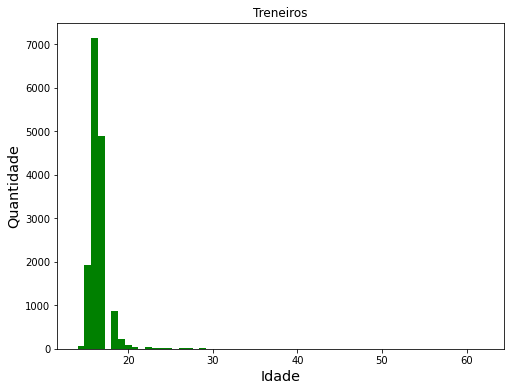

In [255]:
import matplotlib.pyplot as plt #biblioteca para plotar gráficos
plt.figure(figsize=(8,6))
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].plot(kind ='hist', title = "Treneiros", bins=60, color = "green")
plt.ylabel("Quantidade", size='x-large')
plt.xlabel("Idade", size='x-large')


Text(0.5, 0, 'Idade')

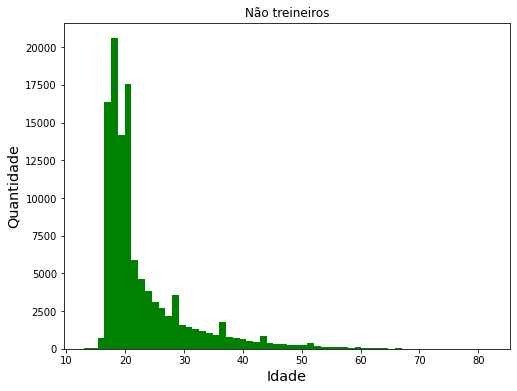

In [256]:
plt.figure(figsize=(8,6))
dados.query("IN_TREINEIRO != 1")["NU_IDADE"].plot(kind ='hist', title = "Não treineiros", bins=60, color = "green")
plt.ylabel("Quantidade", size='x-large')
plt.xlabel("Idade", size='x-large')

Com a plotagem fica evidente que a maioria do treineiros estão entre 13 e 16 anos de idade. A partir dos 17 anos nota-se um grande aumento na quantidade de não treineiros.


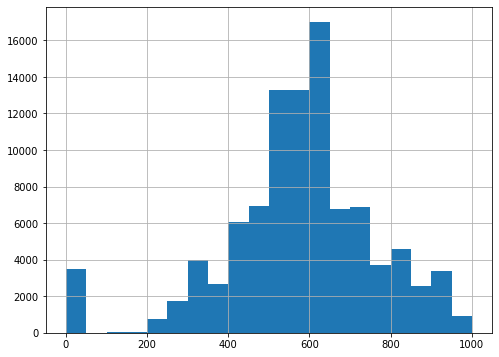

In [257]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

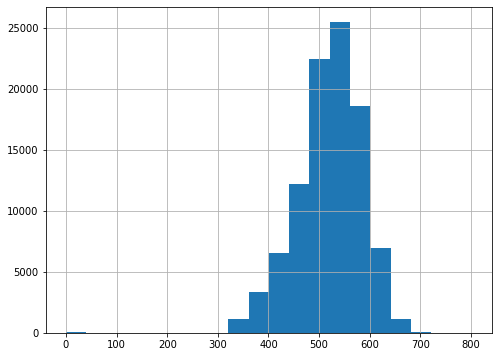

In [258]:
dados["NU_NOTA_LC"].hist(bins = 20, figsize=(8, 6))

In [259]:
dados["NU_NOTA_REDACAO"].mean() #média

571.5700253970197

In [260]:
dados["NU_NOTA_REDACAO"].std() #desvio padrão

188.07645455749753

In [261]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [262]:
dados["NU_NOTA_LC"].quantile(0.1)

434.5

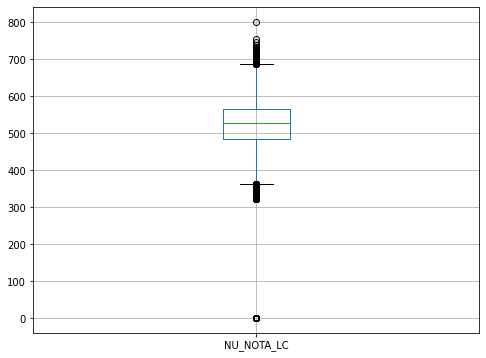

In [263]:
dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))

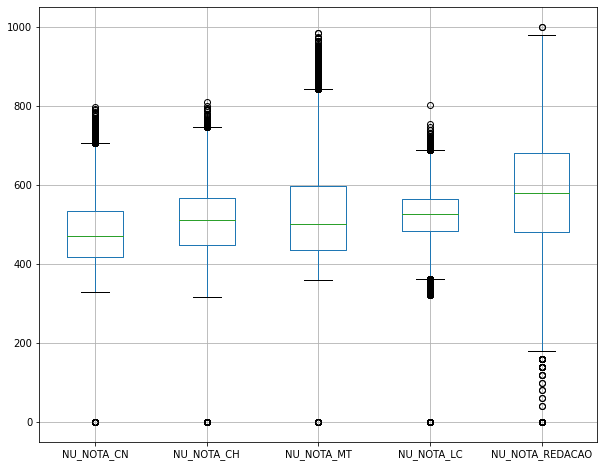

In [264]:
dados[provas].boxplot(grid=True, figsize= (10,8))

**Desafio 05:** Comparar as distribuições das provas em inglês e espanhol



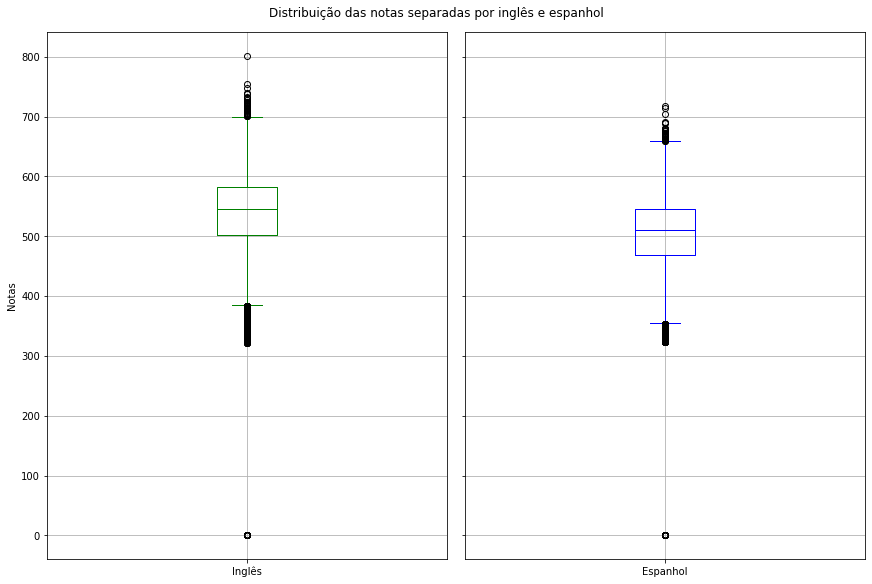

In [265]:
ingles = dados.query("TP_LINGUA == 0")["NU_NOTA_LC"]
espanhol = dados.query("TP_LINGUA == 1")["NU_NOTA_LC"]

fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey = True, constrained_layout = True)
fig.suptitle("Distribuição das notas separadas por inglês e espanhol")
ingles.plot.box(ax = axes[0], ylabel = "Notas", label = "Inglês", grid = True, color = "green")
espanhol.plot.box(ax = axes[1], label = "Espanhol", grid = True, color = "blue")

A mediana dos que escolheram a prova de Inglês foi maior comparando com a dos que escolheram Espanhol.




**Desafio 06:** Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

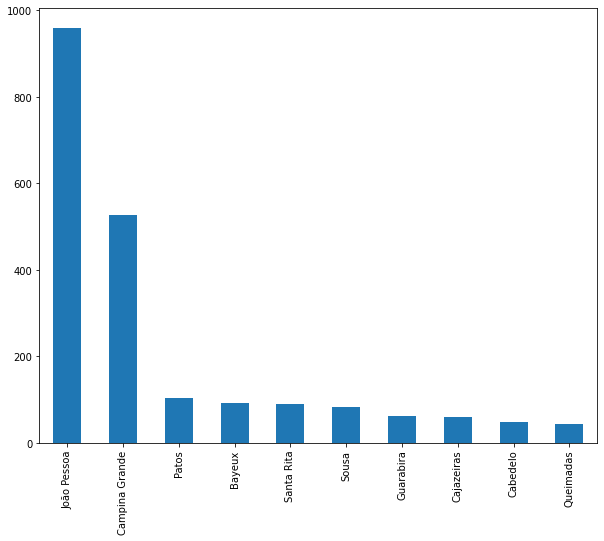

In [266]:
dados.query("SG_UF_RESIDENCIA == 'PB'")["NO_MUNICIPIO_RESIDENCIA"].value_counts().sort_values(ascending=False)[:10].plot(kind = 'bar', figsize=(10, 8))


As 10 cidades que tiveram maior número de inscritos. Como já era de se esperar, João Pessoa(a capital do Estado) teve o maior número de inscritos.  

Text(0.5, 1.0, 'Distribuições das notas na Paraíba')

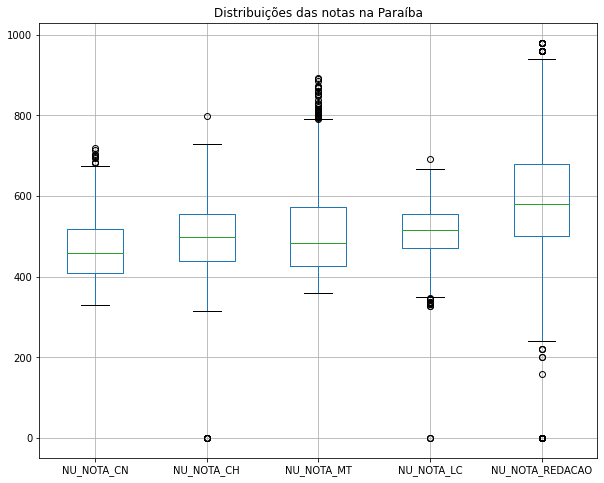

In [267]:
provas_pb = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO", "SG_UF_RESIDENCIA"]
provas_escritas = ["Ciências da Natureza", "Ciências Humanas","Matemática", "Linguagens e Códigos", "Redação"]
dados[provas_pb].query("SG_UF_RESIDENCIA == 'PB'").plot.box(figsize =(10, 8), grid =True).set_title("Distribuições das notas na Paraíba")


In [268]:
print("==========-=-==========")
for i, j in enumerate(provas_pb[:5]):
  media_pb = dados.query("SG_UF_RESIDENCIA == 'PB'")[j].mean()
  media_brasil = dados[j].mean()
  if(media_pb >= media_brasil):
      print(f"A Paraíba obteve uma média acima da Brasileira em {provas_escritas[i]}")
  else:
      print(f"A Paraíba não obteve uma média acima da Brasileira em {provas_escritas[i]}")
  print(f"Médias em {provas_escritas[i]}:")
  print(f"Brasil: {media_brasil:.2f}    Paraíba: {media_pb:.2f}")
  print("==========-=-==========")
  

==========-=-==========
A Paraíba não obteve uma média acima da Brasileira em Ciências da Natureza
Médias em Ciências da Natureza:
Brasil: 477.96    Paraíba: 467.06
==========-=-==========
A Paraíba não obteve uma média acima da Brasileira em Ciências Humanas
Médias em Ciências Humanas:
Brasil: 507.37    Paraíba: 497.36
==========-=-==========
A Paraíba não obteve uma média acima da Brasileira em Matemática
Médias em Matemática:
Brasil: 523.56    Paraíba: 508.43
==========-=-==========
A Paraíba não obteve uma média acima da Brasileira em Linguagens e Códigos
Médias em Linguagens e Códigos:
Brasil: 520.46    Paraíba: 510.70
==========-=-==========
A Paraíba obteve uma média acima da Brasileira em Redação
Médias em Redação:
Brasil: 571.57    Paraíba: 576.89
==========-=-==========
